# Session 3: Introduction to sequence modeling

In this session we are going to deal with sequences, see how we can model different types of problems as sequences and how to deal with them from a machine learning perspective. 

## Sequencces in real life

<img src="https://fr.mathworks.com/help/examples/matlab/win64/GetDataFromAudioRecorderObjectExample_01.png" height=300>

<img src="https://www.quickanddirtytips.com/sites/default/files/images/490/sentence-length.jpg" height=300>

<img src="https://www.sigmaaldrich.com/content/dam/sigma-aldrich/articles/biology/marketing-assets/sanger-sequencing_dna-structure.png" height=300>

<img src="https://d2gk6qz8djobw9.cloudfront.net/slider/15949868021163832.jpg" height=300>

## Application of sequences

Depending on the type of sequence problem we are treating, there are many ways in how we can model it in terms of inputs and outputs. as shown in the image below:

<img src="https://drive.google.com/uc?export=view&id=1iyG0kjLo2Nbj6Y7zHTTLX2CMxwqu1Vd0" height=400>

We can use neural networks also for this types of problems, but until now the tasks that we were doing doesn't have time dependence between them. Another point is that using standard neural networks for time series is that they may be too big for covering many time steps or we may fail in capturing time dependencies that are too far away from each other. There is one neural network model that broke through those barrries in sequence modeling and started to advance the state of the art in fields like Natural Language processing and that is Recurrent Neural Networks.

<img src="https://www.drive.google.com/uc?export=view&id=10adlM-TdQNRfl4Tjx_6Wxtrcaqt1_Tox" height=400>

## Recurrent Neural Networks




Recurrent nerual networks are a family of neural network architectures that are used for sequential data and use the notion of recurrence. They can have many forms in terms of applications but the basic notion is that the parameters of the model are shared through the entire time history and it takes as input the state of the previous time-step.

<img src="https://www.drive.google.com/uc?export=view&id=1ZU-vB8owBqqhRGo2PBnv5AWn4v3Cram8" height=200>
<img src="https://www.drive.google.com/uc?export=view&id=1ELNhN9RTrIHAM22rzBJA8MlnV09CGd3D" height=200>

LSTMs
_______________
Common Problem with RNNs: Vanishing and exploding gradients tend to appear when a gradient of an output is small or large, so that error is going to propagate through the whole sequence making the learning diverge or stop updating the weights. This vanishing/exploding gradient problem is usally present when dealing with problems with long range dependencies.

One way to deal with these problems and address long-range dependencies is by adding gates to the RNN cell. One of the most effectives architectures for this are Long-Short Term Memory networks or LSTMs. 

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" width=1200>

\begin{equation}
\begin{array}{l}
i_{t}=\sigma\left(W_{i i} x_{t}+b_{i i}+W_{h i} h_{t-1}+b_{h i}\right) \\
f_{t}=\sigma\left(W_{i f} x_{t}+b_{i f}+W_{h f} h_{t-1}+b_{h f}\right) \\
g_{t}=\tanh \left(W_{i g} x_{t}+b_{i g}+W_{h g} h_{t-1}+b_{h g}\right) \\
o_{t}=\sigma\left(W_{i o} x_{t}+b_{i o}+W_{h o} h_{t-1}+b_{h o}\right) \\
c_{t}=f_{t} \odot c_{t-1}+i_{t} \odot g_{t} \\
h_{t}=o_{t} \odot \tanh \left(c_{t}\right)
\end{array}
\end{equation}

The LSTM has 4 gates that control the flow of information:

*   The forget gate $f_t$ that takes the previous hidden state and the current input to determine how much informaion of the hidden state to forget.
*   The input gate $i_t$ that controls how much of the new input to retain.
*   The external input gate $g_t$ that controls which parts of the hidden step to update.
*   The output gate $o_t$ that controls which information to pass to the next time step.

The LSTM introduces a cell state, that serves as a memory for the cell of the network.

#Generaring Names with a Character RNN

Tutorial from pytorch [docs](https://pytorch.org/tutorials/intermediate/char_rnn_generation_tutorial.html).

<img src="https://i.imgur.com/jzVrf7f.png">

In [1]:
!gdown --id 1ccN7lWQTyrH27NsB__7zNqqSVVFzOCe4
!unzip ./data.zip

Downloading...
From: https://drive.google.com/uc?id=1ccN7lWQTyrH27NsB__7zNqqSVVFzOCe4
To: /content/data.zip
2.88MB [00:00, 90.2MB/s]
Archive:  ./data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  


## Helper functions

Here it is defined a set of functions that are going to be used to train the network. The network takes as input a category, the current letter and the current hidden state and it outputs the predicted letter and next hidden state. For training the network we select randomly a pair of category and word that then are one-hot encoded and fed into the network. The predictions are compared to a target letter for each time step in order to compute the loss function and then find the gradients used for updating the weights of the model.

In [2]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters) + 1 # Plus EOS marker

def findFiles(path): return glob.glob(path)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

# Build the category_lines dictionary, a list of lines per category
category_lines = {}
all_categories = []
for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

if n_categories == 0:
    raise RuntimeError('Data not found. Make sure that you downloaded data '
        'from https://download.pytorch.org/tutorial/data.zip and extract it to '
        'the current directory.')

print('# categories:', n_categories, all_categories)
print(unicodeToAscii("O'Néàl"))

import random

# Random item from a list
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

# Get a random category and random line from that category
def randomTrainingPair():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    return category, line

# One-hot vector for category
def categoryTensor(category):
    li = all_categories.index(category)
    tensor = torch.zeros(1, n_categories)
    tensor[0][li] = 1
    return tensor

# One-hot matrix of first to last letters (not including EOS) for input
def inputTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

# LongTensor of second letter to end (EOS) for target
def targetTensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1) # EOS
    return torch.LongTensor(letter_indexes)

# Make category, input, and target tensors from a random category, line pair
def randomTrainingExample():
    category, line = randomTrainingPair()
    category_tensor = categoryTensor(category)
    input_line_tensor = inputTensor(line)
    target_line_tensor = targetTensor(line)
    return category_tensor, input_line_tensor, target_line_tensor

# categories: 18 ['Chinese', 'Dutch', 'Vietnamese', 'Scottish', 'Portuguese', 'Italian', 'Korean', 'Russian', 'English', 'Czech', 'Irish', 'Greek', 'German', 'Arabic', 'Polish', 'Japanese', 'French', 'Spanish']
O'Neal


In [3]:
import torch
import torch.nn as nn

class LSTM_name(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM_name, self).__init__()
        self.hidden_size = hidden_size
        self.i2o = nn.Linear(n_categories + input_size, input_size)
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.o2o = nn.Linear(hidden_size,output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, category, input, hidden):
        input_combined = torch.cat((category.unsqueeze(1), input.unsqueeze(1)), -1)
        #hidden = self.i2h(input_combined)
        output = self.i2o(input_combined)
        #output_combined = torch.cat((hidden, output), 1)
        output, hidden = self.lstm(output, hidden)
        output = self.o2o(output.reshape(-1, self.hidden_size))
        output = self.dropout(output)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self, batch_size):
        ''' Initializes hidden state '''
        h0 = torch.zeros((1,batch_size,self.hidden_size)).to(device)
        c0 = torch.zeros((1,batch_size,self.hidden_size)).to(device)
        hidden = (h0,c0)
        return hidden

## Model and Training loop

In [4]:
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size

        self.i2h = nn.Linear(n_categories + input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(n_categories + input_size + hidden_size, output_size)
        self.o2o = nn.Linear(hidden_size + output_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, category, input, hidden):
        input_combined = torch.cat((category, input, hidden), 1)
        hidden = self.i2h(input_combined)
        output = self.i2o(input_combined)
        output_combined = torch.cat((hidden, output), 1)
        output = self.o2o(output_combined)
        output = self.dropout(output)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [5]:
criterion = nn.NLLLoss()

def train(category_tensor, input_line_tensor, target_line_tensor, optimizer):
    target_line_tensor.unsqueeze_(-1).to(device)
    input_line_tensor =  input_line_tensor.to(device)
    target_line_tensor = target_line_tensor.to(device)
    hidden = rnn.initHidden(input_line_tensor.shape[1])
    optimizer.zero_grad()

    loss = 0

    for i in range(input_line_tensor.size(0)):
        output, hidden = rnn(category_tensor.to(device), input_line_tensor[i], hidden)
        l = criterion(output, target_line_tensor[i])
        loss += l

    loss.backward()
    optimizer.step()

    return output, loss.item() / input_line_tensor.size(0)

In [6]:
import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [7]:
device = "cpu"

In [8]:
rnn = LSTM_name(n_letters, 128, n_letters).to(device)
optimizer = torch.optim.SGD(rnn.parameters(),lr=5e-4)

n_iters = 100000
print_every = 5000
plot_every = 500
all_losses = []
total_loss = 0 # Reset every plot_every iters

start = time.time()

for iter in range(1, n_iters + 1):
    output, loss = train(*randomTrainingExample(),optimizer=optimizer)
    total_loss += loss

    if iter % print_every == 0:
        print('%s (%d %d%%) %.4f' % (timeSince(start), iter, iter / n_iters * 100, loss))

    if iter % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0

0m 29s (5000 5%) 2.6536
0m 58s (10000 10%) 2.8172
1m 27s (15000 15%) 2.6967
1m 55s (20000 20%) 3.1121
2m 24s (25000 25%) 2.4154
2m 53s (30000 30%) 3.0871
3m 22s (35000 35%) 3.4330
3m 51s (40000 40%) 3.0136
4m 21s (45000 45%) 2.9528
4m 50s (50000 50%) 2.9063
5m 19s (55000 55%) 2.9427
5m 48s (60000 60%) 3.6327
6m 17s (65000 65%) 2.1574
6m 46s (70000 70%) 2.9723
7m 15s (75000 75%) 2.7193
7m 45s (80000 80%) 2.0331
8m 14s (85000 85%) 2.6146
8m 44s (90000 90%) 2.9569
9m 13s (95000 95%) 2.3062
9m 43s (100000 100%) 3.5351


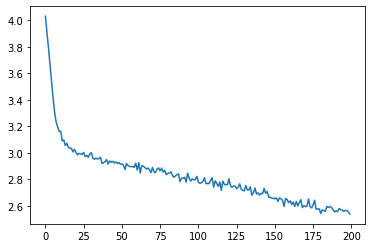

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

In [10]:
max_length = 20
rnn = rnn.cpu()
rnn.eval()
# Sample from a category and starting letter
def sample(category, start_letter='A'):
    with torch.no_grad():  # no need to track history in sampling
        category_tensor = categoryTensor(category)
        input = inputTensor(start_letter)
        hidden = rnn.initHidden(1)

        output_name = start_letter

        for i in range(max_length):
            output, hidden = rnn(category_tensor, input[0], hidden)
            topv, topi = output.topk(1)
            topi = topi[0][0]
            if topi == n_letters - 1:
                break
            else:
                letter = all_letters[topi]
                output_name += letter
            input = inputTensor(letter)

        return output_name

# Get multiple samples from one category and multiple starting letters
def samples(category, start_letters='ABC'):
    print(category)
    print('---')
    for start_letter in start_letters:
        print(sample(category, start_letter))
    print("   ")

samples('Russian', 'RUS')

samples('German', 'GER')

samples('Spanish', 'SPA')

samples('Chinese', 'CHI')


Russian
---
Ranin
Uanin
Santik
   
German
---
Ganen
Eanen
Ranen
   
Spanish
---
Saran
Paran
Aanan
   
Chinese
---
Can
Han
Ian
   


# Sentiment Analysis using a LSTM

Network Architecture
_______________________

<img src="https://raw.githubusercontent.com/bentrevett/pytorch-sentiment-analysis/2b666b3cba7d629a2f192c7d9c66fadcc9f0c363/assets/sentiment3.png" width=400>

Bidirectional LSTM

<img src="https://raw.githubusercontent.com/bentrevett/pytorch-sentiment-analysis/2b666b3cba7d629a2f192c7d9c66fadcc9f0c363/assets/sentiment4.png" width=400>

Multi-Layer LSTM

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext import datasets
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import Vocab
from torch.utils.data.dataset import random_split
from torch.nn.utils.rnn import pad_sequence
import os

In [24]:
train_iter, test_iter = datasets.IMDB()
max_vocab_size = 25000
tokenizer = get_tokenizer('spacy')
for root, dir, files in os.walk('./'):
      if 'counter_imdb.py' in files:
         counter = torch.load('counter_imdb.py')
if counter is None:
  counter = Counter()
  for (label, line) in train_iter:
      counter.update(tokenizer(line))
vocab = Vocab(counter, min_freq=1, max_size=max_vocab_size, vectors="glove.6B.100d",
              unk_init =torch.Tensor.normal_)

text_pipeline = lambda x: [vocab[token] for token in tokenizer(x)]
def label_pipeline(x):
  if x=='pos':
    return 1
  else:
    return 0

def collate_batch(batch):
    label_list, text_list, text_lengths = [], [], []
    for (_label, _text) in batch:
         label_list.append(label_pipeline(_label))
         processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
         text_list.append((processed_text))
         text_lengths.append(len(processed_text))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    text_lengths = torch.tensor(text_lengths, dtype=torch.int64)
    text_list = pad_sequence(text_list, batch_first=True)
    return label_list.to(device), text_list.to(device), text_lengths.to(device)

.vector_cache/glove.6B.zip: 862MB [02:43, 5.29MB/s]                           
100%|█████████▉| 398589/400000 [00:21<00:00, 18705.40it/s]

In [25]:
class RNN(nn.Module):
  def __init__(self,vocab_size,embed_dim,hidden_dim,num_layers, pad_idx):
    super(RNN,self).__init__()
    self.num_layers = num_layers
    self.hidden_dim = hidden_dim
    self.embed = nn.Embedding(vocab_size,embed_dim, padding_idx = pad_idx)

    self.rnn = nn.LSTM(input_size=embed_dim, hidden_size = hidden_dim,
                        num_layers = num_layers,bidirectional=True, batch_first=True)
    
    self.fc = nn.Sequential(nn.Dropout(0.3),nn.Linear(2*hidden_dim,1),nn.Sigmoid())

  def forward(self,x,h0, text_lengths):
    x = self.embed(x)
    x = nn.utils.rnn.pack_padded_sequence(x, text_lengths.to('cpu'), batch_first=True, enforce_sorted=False)
    x, (hidden, cell) = self.rnn(x,h0)
    x, output_lengths = nn.utils.rnn.pad_packed_sequence(x, batch_first=True)
    hidden = self.fc(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
    return hidden
  
  def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        h0 = torch.zeros((self.num_layers*2,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.num_layers*2,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

In [26]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round((preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [27]:
def train(epochs,model, train_dataloader, val_dataloader=None):
  model = model
  learn_rate = 1e-3
  n_epochs = epochs
  #Loss function and Optimizer
  criterion = nn.BCELoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=learn_rate)
  
  #Training Loop
  train_loss = []
  val_loss = []
  metric = []
  for epoch in range(n_epochs):  # loop over the dataset multiple times
      epoch_loss = 0.0
      running_loss = 0.0
      for i, (label, text, text_lengths) in enumerate(train_dataloader):
          # zero the parameter gradients
          h = model.init_hidden(label.shape[0])
          optimizer.zero_grad()
          # forward + backward + optimize
          predicted_label = model(text,h,text_lengths)
          loss = criterion(predicted_label.squeeze(), label.float())
          loss.backward()
          optimizer.step()
          epoch_loss += loss.item()
          # print statistics
          running_loss += loss.item()

          if i % 10 == 9:    # print every 50 mini-batches
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 50))
              running_loss = 0.0
      train_loss.append(epoch_loss/(i+1))
      #Evaluation of the trained model
      epoch_loss = 0.0
      acc = 0.0
      if val_dataloader:
        print("validating...")
        with torch.no_grad():
            for i, (label, text, text_lengths) in enumerate(val_dataloader):
                val_h = model.init_hidden(label.shape[0])
                predicted_label = model(text, val_h,text_lengths)
                loss = criterion(predicted_label.squeeze(), label.float())
                acc += binary_accuracy(predicted_label.squeeze(), label.float()).item()
                epoch_loss += loss.item()
        acc = acc/(i+1)
        print('Accuracy of the network on the test reviews: %d %%' % (acc*100))
        metric.append(acc)
        val_loss.append(epoch_loss/(i+1))
  return train_loss, val_loss, metric

In [28]:
vocab_size = len(vocab)
embed_dim = 100
hidden_dim = 32
num_layers = 2
pad_idx = vocab.stoi['pad']
#initialize RNN
model = RNN(vocab_size,embed_dim,hidden_dim,num_layers,pad_idx).to(device)
print(model)
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

RNN(
  (embed): Embedding(25002, 100, padding_idx=7362)
  (rnn): LSTM(100, 32, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Sequential(
    (0): Dropout(p=0.3, inplace=False)
    (1): Linear(in_features=64, out_features=1, bias=True)
    (2): Sigmoid()
  )
)
The model has 2,559,657 trainable parameters


In [29]:
pretrained_embeddings = vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([25002, 100])


In [30]:
model.embed.weight.data.copy_(pretrained_embeddings)

tensor([[ 1.1238,  1.0740,  0.8681,  ..., -0.0411,  0.6282, -0.2794],
        [-0.0228, -0.4608,  1.0378,  ..., -1.4042, -0.8631, -0.7095],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [ 0.2803,  0.3088, -0.9988,  ...,  0.5626, -0.6608,  0.2311],
        [-0.7623, -3.2756, -1.4336,  ...,  0.3165, -0.2649, -0.5028],
        [-1.2283, -0.2228,  0.3736,  ..., -1.0457,  0.0717, -1.9456]],
       device='cuda:0')

In [31]:
UNK_IDX = vocab.stoi['unk']

model.embed.weight.data[UNK_IDX] = torch.zeros(embed_dim)
model.embed.weight.data[pad_idx] = torch.zeros(embed_dim)

print(model.embed.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0228, -0.4608,  1.0378,  ..., -1.4042, -0.8631, -0.7095],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [ 0.2803,  0.3088, -0.9988,  ...,  0.5626, -0.6608,  0.2311],
        [-0.7623, -3.2756, -1.4336,  ...,  0.3165, -0.2649, -0.5028],
        [-1.2283, -0.2228,  0.3736,  ..., -1.0457,  0.0717, -1.9456]],
       device='cuda:0')


In [32]:
#Dataloaders
train_iter, test_iter = datasets.IMDB()
train_dataset = list(train_iter)
test_dataset = list(test_iter)
num_train = int(len(train_dataset) * 0.6)
batch_size = 128
split_train_, split_valid_ = \
    random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=batch_size, collate_fn=collate_batch,
                              shuffle=True)
valid_dataloader = DataLoader(split_valid_, batch_size=batch_size, collate_fn=collate_batch,
                              shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_batch,
                             shuffle=True)

In [33]:
train_loss, val_loss, metric = train(epochs=1, model=model, train_dataloader=train_dataloader, val_dataloader=valid_dataloader)

[1,    10] loss: 0.139
[1,    20] loss: 0.138
[1,    30] loss: 0.138
[1,    40] loss: 0.138
[1,    50] loss: 0.137
[1,    60] loss: 0.134
[1,    70] loss: 0.130
[1,    80] loss: 0.122
[1,    90] loss: 0.120
[1,   100] loss: 0.112
[1,   110] loss: 0.108
validating...
Accuracy of the network on the test reviews: 71 %


In [34]:
import spacy
nlp = spacy.load('en_core_web_sm')

def predict_sentiment(model, sentence):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    indexed = [vocab.stoi[t] for t in tokenized]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(0)
    length_tensor = torch.LongTensor(length)
    prediction = model(tensor,model.init_hidden(1), length_tensor)
    if torch.round(prediction) == 0:
      print('negative review')
    else:
      print('positive review')
    return prediction.item()

In [37]:
predict_sentiment(model, "Should be fired and sued for destroying justice league movie.")

negative review


0.30479729175567627

In [38]:
predict_sentiment(model, "Great movie, i liked the acting and the music.")

positive review


0.8432211875915527

In [39]:
predict_sentiment(model, "Dying is so much fun!")

positive review


0.6407315731048584

#Exercises



## 1. Create a Name Generator using a LSTM

We trained a LSTM model to generate names from a certain origin and a starting letter.

That means we can generate a totally random name by using our trained model if we randomize the origin and the starting letter.

In [ ]:
RanCategory  = all_categories[random.randint(0,17)]
RanLetter    = random.choice('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

def samples(category, start_letters='ABC'):
    print(category)
    print('---')
    for start_letter in start_letters:
        print(sample(category, start_letter))
    
sample(RanCategory, RanLetter)

## 2. Create a Multi-Class Text Classifier

For this task we will use the Yahoo Answers dataset, it has questions and 10 categories:

<img src="https://www.drive.google.com/uc?view=export&id=1Af1S0L4207Yfw9QPXqhcUYCJO5RXei8I">

For this problem we will use a similar LSTM model as before but with some differences:

* We will use the CrossEntropyLoss.
* The output dimension of the linear layers will be 10.
* We need to remove the squeeze() in the prediced labels when calculating the loss.
* Remove the conversion t float() of the labels.
* Remove the activation of the final linear layer, CrossEntropyLoss does logSoftmax and Negative log-likelihood combined.

In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext import datasets
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import Vocab
from torch.utils.data.dataset import random_split
from torch.nn.utils.rnn import pad_sequence

In [52]:
train_iter, test_iter = datasets.YahooAnswers()


yahoo_answers_csv.tar.gz: 0.00B [00:00, ?B/s]
yahoo_answers_csv.tar.gz: 4.21MB [00:00, 28.1MB/s]
yahoo_answers_csv.tar.gz: 12.5MB [00:00, 35.1MB/s]
yahoo_answers_csv.tar.gz: 16.8MB [00:00, 36.0MB/s]
yahoo_answers_csv.tar.gz: 25.2MB [00:00, 42.1MB/s]
yahoo_answers_csv.tar.gz: 33.6MB [00:00, 47.2MB/s]
yahoo_answers_csv.tar.gz: 50.3MB [00:00, 56.9MB/s]
yahoo_answers_csv.tar.gz: 67.1MB [00:00, 61.7MB/s]
yahoo_answers_csv.tar.gz: 83.9MB [00:01, 57.9MB/s]
yahoo_answers_csv.tar.gz: 101MB [00:01, 66.2MB/s] 
yahoo_answers_csv.tar.gz: 115MB [00:01, 78.7MB/s]
yahoo_answers_csv.tar.gz: 125MB [00:01, 77.4MB/s]
yahoo_answers_csv.tar.gz: 145MB [00:01, 95.4MB/s]
yahoo_answers_csv.tar.gz: 159MB [00:02, 72.5MB/s]
yahoo_answers_csv.tar.gz: 180MB [00:02, 90.1MB/s]
yahoo_answers_csv.tar.gz: 200MB [00:02, 108MB/s] 
yahoo_answers_csv.tar.gz: 215MB [00:02, 93.6MB/s]
yahoo_answers_csv.tar.gz: 231MB [00:02, 107MB/s] 
yahoo_answers_csv.tar.gz: 244MB [00:03, 60.9MB/s]
yahoo_answers_csv.tar.gz: 266MB [00:03, 77.5

In [53]:
max_vocab_size = 25000
#tokenizer = get_tokenizer('spacy')
counter = torch.load('counter_yahoo.py')
tokenizer = get_tokenizer('spacy')
'''if counter is None:
  counter = Counter()
  for (label, line) in train_iter:
      counter.update(tokenizer(line))'''
vocab = Vocab(counter, min_freq=1, max_size=max_vocab_size, vectors="glove.6B.100d",
              unk_init =torch.Tensor.normal_)

In [54]:
next(test_iter)

(9,
 "What makes friendship click? How does the spark keep going? good communication is what does it.  Can you move beyond small talk and say what's really on your mind.  If you start doing this, my expereince is that potentially good friends will respond or shun you.  Then you know who the really good friends are.")

In [55]:
text_pipeline = lambda x: [vocab[token] for token in tokenizer(x)]
label_pipeline = lambda x: int(x) - 1

def collate_batch(batch):
    label_list, text_list, text_lengths = [], [], []
    for (_label, _text) in batch:
         label_list.append(label_pipeline(_label))
         processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
         text_list.append((processed_text))
         text_lengths.append(len(processed_text))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    text_lengths = torch.tensor(text_lengths, dtype=torch.int64)
    text_list = pad_sequence(text_list, batch_first=True)
    return label_list.to(device), text_list.to(device), text_lengths.to(device)

In [56]:
[vocab[token] for token in ['here', 'is', 'an', 'example']]

[193, 11, 59, 387]

In [57]:
# Build your LSTM model

class RNN(nn.Module):
  def __init__(self,vocab_size,embed_dim,hidden_dim,num_layers, pad_idx):
    super(RNN,self).__init__()
    self.num_layers = num_layers
    self.hidden_dim = hidden_dim
    self.embed = nn.Embedding(vocab_size,embed_dim, padding_idx = pad_idx)

    self.rnn = nn.LSTM(input_size=embed_dim, hidden_size = hidden_dim,
                        num_layers = num_layers,bidirectional=True, batch_first=True)
    
    self.fc = nn.Sequential(nn.Dropout(0.3),nn.Linear(2*hidden_dim,10))

  def forward(self,x,h0, text_lengths):
    x = self.embed(x)
    x = nn.utils.rnn.pack_padded_sequence(x, text_lengths.to('cpu'), batch_first=True, enforce_sorted=False)
    x, (hidden, cell) = self.rnn(x,h0)
    x, output_lengths = nn.utils.rnn.pad_packed_sequence(x, batch_first=True)
    hidden = self.fc(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
    return hidden
  
  def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        h0 = torch.zeros((self.num_layers*2,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.num_layers*2,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

In [58]:
def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    top_pred = preds.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [59]:
def train(epochs,model, train_dataloader, val_dataloader=None):
  model = model
  learn_rate = 1e-6
  n_epochs = epochs

  #Loss function and Optimizer
  criterion = nn.CrossEntropyLoss()                                       #define loss function
  optimizer = torch.optim.Adam(model.parameters(),lr=learn_rate)
  
  #Training Loop
  train_loss = []
  val_loss = []
  metric = []
  for epoch in range(n_epochs):  # loop over the dataset multiple times
      epoch_loss = 0.0
      running_loss = 0.0
      for i, (label, text, text_lengths) in enumerate(train_dataloader):
          # zero the parameter gradients
          h = model.init_hidden(label.shape[0])
          optimizer.zero_grad()
          # forward + backward + optimize
          predicted_label = model(text,h,text_lengths)
          loss = criterion(predicted_label, label)
          loss.backward()
          optimizer.step()
          epoch_loss += loss.item()
          # print statistics
          running_loss += loss.item()

          if i % 10 == 9:    # print every 10 mini-batches
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 50))
              running_loss = 0.0
      train_loss.append(epoch_loss/(i+1))
      #Evaluation of the trained model
      epoch_loss = 0.0
      acc = 0.0
      if val_dataloader:
        print("validating...")
        with torch.no_grad():
            for i, (label, text, text_lengths) in enumerate(val_dataloader):
                val_h = model.init_hidden(label.shape[0])
                predicted_label = model(text, val_h,text_lengths)
                loss = criterion(predicted_label, label)
                acc += categorical_accuracy(predicted_label, label)
                epoch_loss += loss.item()
        acc = acc.item()/(i+1)
        print('Accuracy of the network on the test reviews: %d %%' % (acc*100))
        metric.append(acc)
        val_loss.append(epoch_loss/(i+1))
  return train_loss, val_loss, metric

In [60]:
vocab_size = len(vocab)
embed_dim = 100
hidden_dim = 32
num_layers = 2
batch_size = 256
pad_idx = vocab.stoi['pad']
#initialize RNN
model = RNN(vocab_size,embed_dim,hidden_dim,num_layers,pad_idx).to(device)
print(model)
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

RNN(
  (embed): Embedding(25002, 100, padding_idx=6363)
  (rnn): LSTM(100, 32, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Sequential(
    (0): Dropout(p=0.3, inplace=False)
    (1): Linear(in_features=64, out_features=10, bias=True)
  )
)
The model has 2,560,242 trainable parameters


In [61]:
pretrained_embeddings = vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([25002, 100])


In [62]:
model.embed.weight.data.copy_(pretrained_embeddings)

tensor([[ 0.0937,  1.1272, -0.1206,  ...,  0.8660, -0.8234, -0.2945],
        [ 0.4095, -1.8548, -0.5510,  ..., -1.4728,  1.8808,  0.2877],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [-0.5802, -0.2761,  0.0615,  ..., -0.2072,  0.6701, -0.0124],
        [ 0.1012,  0.1275, -0.5836,  ...,  0.3038,  0.4337, -0.4741],
        [-0.3046, -0.1888, -0.6205,  ...,  0.5561,  0.3136,  0.2580]],
       device='cuda:0')

In [63]:
UNK_IDX = vocab.stoi['unk']

model.embed.weight.data[UNK_IDX] = torch.zeros(embed_dim)
model.embed.weight.data[pad_idx] = torch.zeros(embed_dim)

print(model.embed.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.4095, -1.8548, -0.5510,  ..., -1.4728,  1.8808,  0.2877],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [-0.5802, -0.2761,  0.0615,  ..., -0.2072,  0.6701, -0.0124],
        [ 0.1012,  0.1275, -0.5836,  ...,  0.3038,  0.4337, -0.4741],
        [-0.3046, -0.1888, -0.6205,  ...,  0.5561,  0.3136,  0.2580]],
       device='cuda:0')


In [64]:
#Dataloaders
train_iter, test_iter = datasets.YahooAnswers()
train_dataset = list(train_iter)
test_dataset = list(test_iter)
num_train = int(len(train_dataset) * 0.6)
split_train_, split_valid_ = \
    random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=batch_size, collate_fn=collate_batch,
                              shuffle=True)
valid_dataloader = DataLoader(split_valid_, batch_size=batch_size, collate_fn=collate_batch,
                              shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_batch,
                             shuffle=True)

----------------------------
Use this to load trained data

In [65]:
model.load_state_dict(torch.load('model_weights.pth'))

FileNotFoundError: ignored

-------------

In [66]:
train_loss, val_loss, metric = train(epochs=1, model=model, train_dataloader=train_dataloader, val_dataloader=valid_dataloader)

[1,    10] loss: 0.462
[1,    20] loss: 0.461
[1,    30] loss: 0.462
[1,    40] loss: 0.462
[1,    50] loss: 0.462
[1,    60] loss: 0.461
[1,    70] loss: 0.460
[1,    80] loss: 0.461
[1,    90] loss: 0.461
[1,   100] loss: 0.461
[1,   110] loss: 0.462
[1,   120] loss: 0.462
[1,   130] loss: 0.462
[1,   140] loss: 0.461
[1,   150] loss: 0.462
[1,   160] loss: 0.462
[1,   170] loss: 0.462
[1,   180] loss: 0.462
[1,   190] loss: 0.461
[1,   200] loss: 0.462
[1,   210] loss: 0.461
[1,   220] loss: 0.462
[1,   230] loss: 0.462
[1,   240] loss: 0.462
[1,   250] loss: 0.463
[1,   260] loss: 0.462
[1,   270] loss: 0.461
[1,   280] loss: 0.462
[1,   290] loss: 0.462


KeyboardInterrupt: ignored

----------------------------------------------------------------
Use this to save trained data

In [67]:
torch.save(model.state_dict(), 'model_weights.pth')

----------------------------------------------------------------

In [68]:
label, text = test_dataset[np.random.randint(len(test_dataset))]

In [69]:
import spacy
nlp = spacy.load('en_core_web_sm')

def predict_sentiment(model, sentence):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    indexed = [vocab.stoi[t] for t in tokenized]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(0)
    length_tensor = torch.LongTensor(length)
    prediction = model(tensor,model.init_hidden(1), length_tensor)
    return prediction.argmax(1).item() + 1

In [71]:
print(text)
print(predict_sentiment(model,text))
print(label)

Being a Human Resources Manager how will formulate an effective HRP process? Regarding the subject details your question does not make sense.  If you want to be a HR manager, you need to learn to spell and use the language properly.
2
4
